In [1]:
import pandas as pd
import numpy as np
import json

dat=open("E:\\Python\\amsterdam.json")

dat=dat.read()

dat[0:100]
    

'{"host_listings_count":{"0":1.0,"1":1.0,"2":1.0,"3":2.0,"4":1.0,"5":1.0,"6":1.0,"7":1.0,"8":3.0,"9":'

In [2]:
data_json=json.loads(dat)


In [3]:
type(data_json)

dict

In [4]:
data_json.keys()

dict_keys(['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'guests_included', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'price', 'latitude', 'longitude', 'room_type', 'instant_bookable'])

In [5]:
print(data_json)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [6]:
hotels= pd.DataFrame.from_dict(data_json)

In [7]:
hotels.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable
0,1.0,6,1.0,2.0,1,3,4,1,$145.00,52.361173,4.866755,Entire home/apt,f
1,1.0,2,1.0,1.0,1,2,17,1,$88.00,52.370237,4.859507,Entire home/apt,f
10,1.0,2,1.0,1.0,1,3,0,1,$130.00,52.371424,4.848644,Entire home/apt,f
100,1.0,5,1.0,4.0,1,5,2,1,$90.00,52.312889,4.980151,Entire home/apt,f
1000,1.0,1,1.0,1.0,1,1,32,1,$39.00,52.395334,4.916701,Private room,t


In [8]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15181 entries, 0 to 9999
Data columns (total 13 columns):
host_listings_count               15178 non-null float64
accommodates                      15181 non-null int64
bathrooms                         15163 non-null float64
bedrooms                          15169 non-null float64
guests_included                   15181 non-null int64
minimum_nights                    15181 non-null int64
number_of_reviews                 15181 non-null int64
calculated_host_listings_count    15181 non-null int64
price                             15181 non-null object
latitude                          15181 non-null float64
longitude                         15181 non-null float64
room_type                         15181 non-null object
instant_bookable                  15181 non-null object
dtypes: float64(5), int64(5), object(3)
memory usage: 1.6+ MB


In [9]:
hotels.describe()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,latitude,longitude
count,15178.000000,15181.000000,15163.000000,15169.000000,15181.000000,15181.000000,15181.000000,15181.000000,15181.000000,15181.000000
mean,3.404994,2.917858,1.122832,1.412222,1.516106,2.882551,17.785456,2.934787,52.365353,4.889025
std,11.324173,1.404973,0.356547,0.885127,1.004709,7.215722,34.747999,8.968696,0.015738,0.034901
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,52.290308,4.753513
25%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,52.355616,4.865016
50%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,7.000000,1.000000,52.365028,4.886344
75%,1.000000,4.000000,1.000000,2.000000,2.000000,3.000000,18.000000,1.000000,52.374829,4.907857
max,106.000000,17.000000,8.000000,10.000000,16.000000,523.000000,496.000000,91.000000,52.426224,5.027689


In [10]:
hotels.shape

(15181, 13)

In [11]:
hotels.bathrooms.describe()

count    15163.000000
mean         1.122832
std          0.356547
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: bathrooms, dtype: float64

In [12]:
hotels.isnull().sum()

host_listings_count                3
accommodates                       0
bathrooms                         18
bedrooms                          12
guests_included                    0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
price                              0
latitude                           0
longitude                          0
room_type                          0
instant_bookable                   0
dtype: int64

In [13]:
hotels.price.describe()

count       15181
unique        378
top       $100.00
freq          833
Name: price, dtype: object

In [14]:
hotels['price']=hotels['price'].str.replace('$',"")
hotels['price']=hotels['price'].str.replace(',',"")

In [15]:
pd.to_numeric(hotels['price'],downcast='unsigned')

0        145
1         88
10       130
100       90
1000      39
10000    118
10001    129
10002    130
10003    135
10004     94
10005    110
10006    120
10007     60
10008     95
10009    125
1001      90
10010    180
10011    138
10012    130
10013    185
10014     95
10015     75
10016     65
10017    100
10018     99
10019    175
1002     110
10020    125
10021    110
10022    130
        ... 
9972     109
9973      55
9974     125
9975     150
9976     160
9977     250
9978      89
9979     200
998       60
9980     260
9981     150
9982     550
9983     280
9984      85
9985     115
9986      85
9987      90
9988      95
9989      80
999      420
9990     150
9991      70
9992     140
9993     175
9994     270
9995     105
9996     150
9997     320
9998      55
9999      55
Name: price, Length: 15181, dtype: uint16

In [16]:
hotels['price']=hotels['price'].astype(float)

In [17]:
round(hotels['price'].mean(),3)

134.799

In [18]:
round(hotels['price'].max(),1)

3142.0

In [19]:
round(hotels['price'].quantile(q=0.99),1)

440.0

In [20]:
index=hotels[hotels['price']>=440]

In [21]:
round(index['price'].quantile(q=0.90),1)

899.8

In [22]:
hotels.dropna().shape

(15148, 13)

In [23]:
hotels

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable
0,1.0,6,1.0,2.0,1,3,4,1,145.0,52.361173,4.866755,Entire home/apt,f
1,1.0,2,1.0,1.0,1,2,17,1,88.0,52.370237,4.859507,Entire home/apt,f
10,1.0,2,1.0,1.0,1,3,0,1,130.0,52.371424,4.848644,Entire home/apt,f
100,1.0,5,1.0,4.0,1,5,2,1,90.0,52.312889,4.980151,Entire home/apt,f
1000,1.0,1,1.0,1.0,1,1,32,1,39.0,52.395334,4.916701,Private room,t
10000,1.0,3,1.0,2.0,1,2,3,1,118.0,52.347202,4.846432,Entire home/apt,f
10001,34.0,4,1.0,2.0,1,2,5,31,129.0,52.344071,4.868194,Entire home/apt,t
10002,1.0,4,1.0,3.0,1,2,10,1,130.0,52.345653,4.869328,Entire home/apt,t
10003,1.0,4,1.0,1.0,1,3,16,1,135.0,52.347393,4.875956,Private room,f
10004,1.0,2,1.0,1.0,1,1,0,1,94.0,52.350096,4.849824,Entire home/apt,f


In [24]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [25]:
>>> lon1, lon2, lat1, lat2 = np.random.randn(4, 1000000)
>>> hotels["d_center"]= haversine_np(hotels['longitude'],hotels['latitude'],4.899431,52.379189)



In [26]:
hotels.sort_values('d_center',ascending=True).tail()


,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable,d_center
6804,1.0,3,1.0,1.0,2,2,37,1,40.0,52.290687,4.983784,Private room,f,11.381113
6779,1.0,4,1.0,3.0,1,3,1,1,101.0,52.292209,4.989963,Entire home/apt,f,11.454847
6791,1.0,2,1.0,1.0,1,1,22,1,50.0,52.292890,4.995102,Private room,t,11.583068
6766,1.0,2,1.0,1.0,1,2,5,1,50.0,52.291664,4.992333,Private room,f,11.592780
6764,1.0,3,1.0,3.0,1,30,0,1,83.0,52.302752,5.020968,Entire home/apt,f,11.842162


In [27]:
round(hotels[hotels['d_center'] <= 1].groupby("room_type").agg({"price":np.mean}),1)

,price
room_type,
Entire home/apt,197.5
Private room,120.6
Shared room,90.2


In [28]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15181 entries, 0 to 9999
Data columns (total 14 columns):
host_listings_count               15178 non-null float64
accommodates                      15181 non-null int64
bathrooms                         15163 non-null float64
bedrooms                          15169 non-null float64
guests_included                   15181 non-null int64
minimum_nights                    15181 non-null int64
number_of_reviews                 15181 non-null int64
calculated_host_listings_count    15181 non-null int64
price                             15181 non-null float64
latitude                          15181 non-null float64
longitude                         15181 non-null float64
room_type                         15181 non-null object
instant_bookable                  15181 non-null object
d_center                          15181 non-null float64
dtypes: float64(7), int64(5), object(2)
memory usage: 2.4+ MB


In [29]:
X=pd.get_dummies(hotels)
X.shape


(15181, 17)

In [30]:
y=hotels['price']

In [31]:
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.3,random_state=200)

In [84]:
abs(X_test['accommodates'].mean()-X_train['accommodates'].mean())
round

4.9399366919278265e-05

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
clf=RandomForestClassifier(n_estimators=80,max_features='sqrt',oob_score=True,n_jobs=-1,random_state=200)

In [35]:
X_train.isnull().sum()

host_listings_count                3
accommodates                       0
bathrooms                         11
bedrooms                           9
guests_included                    0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
price                              0
latitude                           0
longitude                          0
d_center                           0
room_type_Entire home/apt          0
room_type_Private room             0
room_type_Shared room              0
instant_bookable_f                 0
instant_bookable_t                 0
dtype: int64

In [36]:
X_train['host_listings_count']=X_train['host_listings_count'].fillna(np.mean(X_train['host_listings_count']))
X_train['bathrooms']=X_train['bathrooms'].fillna(np.mean(X_train['bathrooms']))
X_train['bedrooms']=X_train['bedrooms'].fillna(np.mean(X_train['bedrooms']))
X_test['host_listings_count']=X_test['host_listings_count'].fillna(np.mean(X_test['host_listings_count']))
X_test['bathrooms']=X_test['bathrooms'].fillna(np.mean(X_test['bathrooms']))
X_test['bedrooms']=X_test['bedrooms'].fillna(np.mean(X_test['bedrooms']))


C:\Users\Lakshmi Narayana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Lakshmi Narayana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Lakshmi Narayana\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [37]:
X_train.isnull().sum()

host_listings_count               0
accommodates                      0
bathrooms                         0
bedrooms                          0
guests_included                   0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
price                             0
latitude                          0
longitude                         0
d_center                          0
room_type_Entire home/apt         0
room_type_Private room            0
room_type_Shared room             0
instant_bookable_f                0
instant_bookable_t                0
dtype: int64

In [38]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
            oob_score=True, random_state=200, verbose=0, warm_start=False)

In [39]:
clf.oob_score_

0.6612083568605308

In [40]:
clf.score(X_test,y_test)

0.6926454445664105

In [41]:
for w in range(30,40,5):
    clf=RandomForestClassifier(n_estimators=w,oob_score=True,n_jobs=-1,random_state=200)
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print ('For n_estimators = '+str(w))
    print ('OOB score is '+str(oob))
    print ('************************')

For n_estimators = 30
OOB score is 0.5895915678524374
************************
For n_estimators = 35
OOB score is 0.6133069828722003
************************


In [46]:
clf=RandomForestClassifier(n_estimators=330,oob_score=True,n_jobs=-1,random_state=200)

In [48]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=330, n_jobs=-1,
            oob_score=True, random_state=200, verbose=0, warm_start=False)

In [49]:
clf.oob_score_

0.7031808770939205

In [51]:
clf.feature_importances_

array([0.02306927, 0.02252241, 0.01938566, 0.02187829, 0.02284521,
       0.04542562, 0.0768458 , 0.02104324, 0.44042866, 0.09329259,
       0.09389349, 0.09273566, 0.00403156, 0.00376543, 0.00074913,
       0.00903192, 0.00905607])

In [53]:
imp_feat=pd.Series(clf.feature_importances_,index=X.columns.tolist())

In [55]:
imp_feat.sort_values(ascending=False)

price                             0.440429
longitude                         0.093893
latitude                          0.093293
d_center                          0.092736
number_of_reviews                 0.076846
minimum_nights                    0.045426
host_listings_count               0.023069
guests_included                   0.022845
accommodates                      0.022522
bedrooms                          0.021878
calculated_host_listings_count    0.021043
bathrooms                         0.019386
instant_bookable_t                0.009056
instant_bookable_f                0.009032
room_type_Entire home/apt         0.004032
room_type_Private room            0.003765
room_type_Shared room             0.000749
dtype: float64

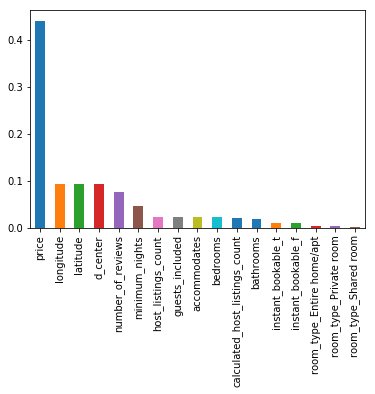

In [57]:
imp_feat.sort_values(ascending=False).plot(kind='bar')

In [64]:
pred=clf.predict(X_test)

In [74]:
errors=abs(pred-y_test)

errors.quantile(q=0.7)

0.0

In [70]:
print('Metrics for Random Forest Trained on Original Data')

print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 5.69 degrees.
Accuracy: 97.33 %.


In [78]:
np.mean(mape)

2.6662127771822792

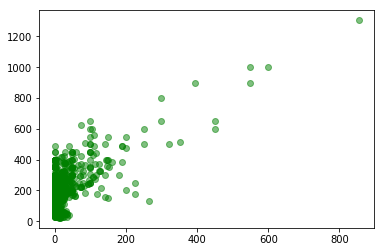

In [82]:


import matplotlib.pyplot as plt



plt.scatter(errors, y_test,color="green", alpha=0.5)

plt.show()